## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

## 0) Instalación de librerías

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import re
import joblib
import os
import requests
import subprocess
import time


import matplotlib.pyplot as plt
from matplotlib import style

from dataclasses import dataclass


# Preprocesado y modelado
from scipy.stats import pearsonr, chi2_contingency

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE=42
np.random.seed(RANDOM_STATE)

#fastapi uvicorn pyngrok pydantic nest-asyncio

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import SGDClassifier

from flask import Flask
from flask import request

import nest_asyncio
import uvicorn



## 1) Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modulo 7/Proyecto 7/Your Career Aspirations of GenZ.csv')


In [4]:
df.head()

,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."
3,India,834003,Male,"People from my circle, but not family members","No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,6,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 2 to 3 people in my team
4,India,301019,Female,Influencers who had successful careers,"No, But if someone could bare the cost I will",Will work for 3 years or more,No,Will NOT work for them,5,Fully Remote with Options to travel as and whe...,Employer who appreciates learning and enables ...,"Self Paced Learning Portals, Learning by obser...",Teaching in any of the institutes/online or Of...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


In [5]:
# Definimos algunas variables (NUEVO TARGET: multilabel)
TARGET = "Which of the below careers looks close to your Aspirational job ?"
ZIP_COL = "Your Current Zip Code / Pin Code"
COUNTRY_COL = "Your Current Country."
GENDER_COL = "Your Gender"

# Target viene como 3 opciones separadas por coma
SEP = ","

TOP_K = 10
RARE_PCT = 0.02
OTHER_LABEL = "Other"
RANDOM_STATE = 42


## 2) EDA: visión general, nulos, duplicados, distribución del target

In [6]:
print("Shape:", df.shape)

Shape: (235, 15)


In [7]:
print("==== INFO() ====")
df.info()

==== INFO() ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 15 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   Your Current Country.                                                                                                     235 non-null    object
 1   Your Current Zip Code / Pin Code                                                                                          235 non-null    int64 
 2   Your Gender                                                                                                               235 non-null    object
 3   Which of the below factors influence the most about your career aspirations ?                                             2

In [8]:
print("Número de valores únicos por columna:")
display(df.nunique())

Número de valores únicos por columna:


,0
Your Current Country.,4
Your Current Zip Code / Pin Code,190
Your Gender,2
Which of the below factors influence the most about your career aspirations ?,5
Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,3
How likely is that you will work for one employer for 3 years or more ?,3
Would you work for a company whose mission is not clearly defined and publicly posted.,2
How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,2
How likely would you work for a company whose mission is not bringing social impact ?,10
What is the most preferred working environment for you.,6


In [9]:
print("\n==== DESCRIBE (incluye categóricas) ====")
display(df.describe(include="all"))


==== DESCRIBE (incluye categóricas) ====


,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
count,235,235.000000,235,235,235,235,235,235,235.000000,235,235,235,235,235,235
unique,4,NaN,2,5,3,3,2,2,NaN,6,5,6,84,5,20
top,India,NaN,Male,My Parents,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,NaN,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Manag...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
freq,231,NaN,156,79,110,139,157,158,NaN,60,113,59,12,129,63
mean,NaN,492560.970213,NaN,NaN,NaN,NaN,NaN,NaN,5.272340,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,213622.174893,NaN,NaN,NaN,NaN,NaN,NaN,2.479463,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1234.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,381012.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,524412.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,607253.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("\nDuplicados (filas completas):", df.duplicated().sum())


Duplicados (filas completas): 0


###Análisis univariable

In [11]:
print("\nTarget (raw) — ejemplo de filas:")
display(df[TARGET].astype(str).head(5))

def parse_labels(x, sep=SEP):
    if pd.isna(x):
        return []
    items = [t.strip() for t in str(x).split(sep)]
    items = [t for t in items if t and t.lower() != "nan"]
    # unique preservando orden
    return list(dict.fromkeys(items))

y_list_raw = df[TARGET].apply(parse_labels)

print("\n#labels por fila:")
display(y_list_raw.apply(len).value_counts().sort_index())

all_labels = y_list_raw.explode().dropna()
print("\nCantidad de etiquetas únicas:", all_labels.nunique())
print("Labels:", sorted(all_labels.unique().tolist()))



Target (raw) — ejemplo de filas:


,Which of the below careers looks close to your Aspirational job ?
0,"Business Operations in any organization, Build..."
1,"Business Operations in any organization, Build..."
2,Manage and drive End-to-End Projects or Produc...
3,"Business Operations in any organization, Manag..."
4,Teaching in any of the institutes/online or Of...



#labels por fila:


,count
Which of the below careers looks close to your Aspirational job ?,
3,235



Cantidad de etiquetas únicas: 10
Labels: ['Become a content Creator in some platform', 'Build and develop a Team', 'Business Operations in any organization', 'Design and Creative strategy in any company', 'Design and Develop amazing software', 'Look deeply into Data and generate insights', 'Manage and drive End-to-End Projects or Products', 'Teaching in any of the institutes/online or Offline', 'Work as a freelancer and do my thing my way', 'Work in a BPO setup for some well known client']


###Gráfico — Frecuencia de carreras (labels)

Como el target es multilabel (3 elecciones por fila), la “distribución del target” se analiza como **frecuencia por etiqueta**.


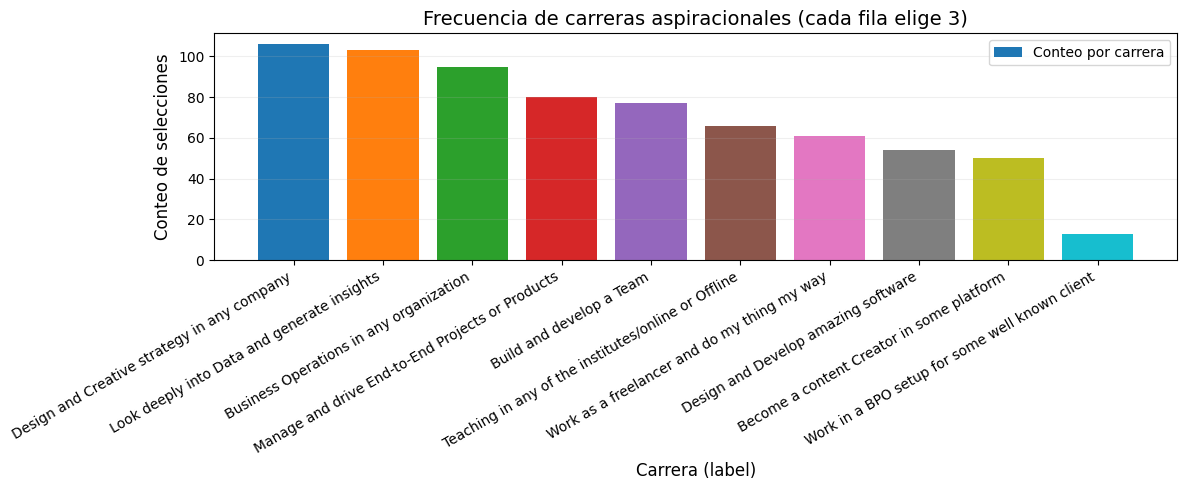

In [12]:
label_counts = all_labels.value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,5))
colors = ["#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd",
          "#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"]
bars = plt.bar(label_counts.index.astype(str), label_counts.values,
               color=colors[:len(label_counts)])

plt.title("Frecuencia de carreras aspiracionales (cada fila elige 3)", fontsize=14)
plt.xlabel("Carrera (label)", fontsize=12)
plt.ylabel("Conteo de selecciones", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend([bars[0]], ["Conteo por carrera"], loc="upper right")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


In [13]:
df_clean = df.copy()

def norm_str(x):
    if pd.isna(x):
        return x
    x = str(x).strip()
    x = re.sub(r"\s+", " ", x)
    x = re.sub(r"\.0$", "", x)
    return x

for c in df_clean.columns:
    if df_clean[c].dtype == "object":
        df_clean[c] = df_clean[c].map(norm_str)

y_list = df_clean[TARGET].apply(parse_labels)

df_clean.head(3)


,Your Current Country.,Your Current Zip Code / Pin Code,Your Gender,Which of the below factors influence the most about your career aspirations ?,Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,How likely is that you will work for one employer for 3 years or more ?,Would you work for a company whose mission is not clearly defined and publicly posted.,How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,How likely would you work for a company whose mission is not bringing social impact ?,What is the most preferred working environment for you.,Which of the below Employers would you work with.,Which type of learning environment that you are most likely to work in ?,Which of the below careers looks close to your Aspirational job ?,What type of Manager would you work without looking into your watch ?,Which of the following setup you would like to work ?
0,India,273005,Male,People who have changed the world for better,"Yes, I will earn and do that","This will be hard to do, but if it is the righ...",No,Will NOT work for them,4,Fully Remote with No option to visit offices,Employer who rewards learning and enables that...,"Instructor or Expert Learning Programs, Trial ...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...","Work alone, Work with 2 to 3 people in my team..."
1,India,851129,Male,People who have changed the world for better,"No, But if someone could bare the cost I will","This will be hard to do, but if it is the righ...",No,Will NOT work for them,1,Fully Remote with Options to travel as and whe...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Instructor or Exp...","Business Operations in any organization, Build...","Manager who explains what is expected, sets a ...",Work with 5 to 6 people in my team
2,India,123106,Female,Social Media like LinkedIn,"Yes, I will earn and do that",Will work for 3 years or more,Yes,Will work for them,7,Hybrid Working Environment with less than 15 d...,Employer who pushes your limits by enabling an...,"Self Paced Learning Portals, Trial and error b...",Manage and drive End-to-End Projects or Produc...,"Manager who explains what is expected, sets a ...","Work with 2 to 3 people in my team, Work with ..."


###Tabla compacta: cardinalidad + rvalores únicos (<=1%) + dominancia

In [14]:
N = len(df_clean)

feature_cols = [c for c in df_clean.columns if c != TARGET]

def rare_summary_compact(col, rare_thr=0.01):
    vc = df_clean[col].value_counts(dropna=False)
    rare_mask = (vc / N) <= rare_thr
    return pd.Series({
        "n_unique": int(df_clean[col].nunique(dropna=False)),
        "rare_levels_(<=1%)": int(rare_mask.sum()),
        "rare_share_%": round((vc[rare_mask].sum() / N) * 100, 2),
        "max_share_%": round((vc.iloc[0] / N) * 100, 2) if len(vc) else np.nan,
        "top1": str(vc.index[0]) if len(vc) else None
    }, name=col)

rare_reports = pd.DataFrame([rare_summary_compact(c) for c in feature_cols]) \
    .sort_values("rare_levels_(<=1%)", ascending=False)

display(rare_reports)


,n_unique,rare_levels_(<=1%),rare_share_%,max_share_%,top1
Your Current Zip Code / Pin Code,190,181,84.26,3.40,605110
Which of the following setup you would like to work ?,20,10,6.81,26.81,Work with 5 to 6 people in my team
Your Current Country.,4,3,1.70,98.30,India
Your Gender,2,0,0.00,66.38,Male
Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,3,0,0.00,46.81,"Yes, I will earn and do that"
Which of the below factors influence the most about your career aspirations ?,5,0,0.00,33.62,My Parents
How likely is that you will work for one employer for 3 years or more ?,3,0,0.00,59.15,"This will be hard to do, but if it is the righ..."
Would you work for a company whose mission is not clearly defined and publicly posted.,2,0,0.00,66.81,No
How likely would you work for a company whose mission is not bringing social impact ?,10,0,0.00,20.85,5
How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,2,0,0.00,67.23,Will NOT work for them


Las columnas Your Current Zip Code / Pin Code y Which of the below careers looks close to your Aspirational job ? son las que presentan mayor desafío debido a su alta cardinalidad y la gran cantidad de categorías raras. Si utilizamos un método como OneHotEncoder directamente sobre estas columnas, se crearían muchísimas nuevas columnas (características), lo que puede llevar a:

Aumento de la dispersión de datos, el df se volvería muy grande y con muchos ceros.

Mayor tiempo de entrenamiento

Riesgo de sobreajuste.

Esto reafirma la importancia de considerar estrategias como la agrupación de categorías raras o el uso de otras técnicas de codificación para manejar estas columnas de manera más eficiente antes de entrenar el modelo.

###Gráfico Top-k

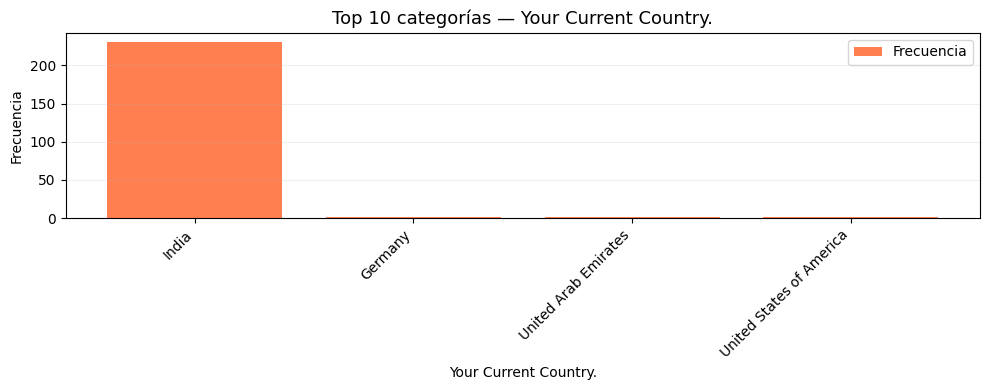

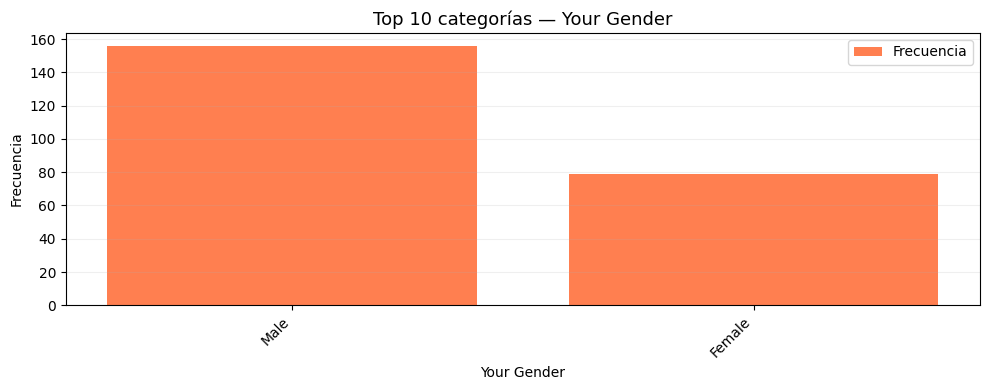

In [15]:
def plot_top_k(df_src, col, k=10):
    if col not in df_src.columns:
        print("No existe:", col)
        return
    vc = df_src[col].value_counts(dropna=False).head(k)

    plt.figure(figsize=(10,4))
    plt.bar(vc.index.astype(str), vc.values, color="coral")
    plt.title(f"Top {k} categorías — {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.legend(["Frecuencia"], loc="upper right")
    plt.grid(axis="y", alpha=0.2)
    plt.tight_layout()
    plt.show()

plot_top_k(df_clean, COUNTRY_COL, TOP_K)
plot_top_k(df_clean, GENDER_COL, TOP_K)


Para 'Your Current Country.':

El gráfico muestra una dominancia abrumadora de un país,'India', ocupando casi la totalidad del eje Y.
Las otras 3 categorías de países tendrían una representación muy pequeña, casi imperceptible en la gráfica.
Esto indica que la mayoría de los encuestados provienen de un solo país, lo que podría implicar un sesgo geográfico en los datos.


Para 'Your Gender' :

El gráfico muestra claramente dos barras, una para 'Male' (Masculino) y otra para 'Female' (Femenino), con 'Male' siendo significativamente más alta que 'Female' (el 70.21% de los encuestados son 'Male').
Esto indica una desproporción en la representación de género en el conjunto de datos.
En resumen, ambos gráficos de 'Top K' resaltan la distribución de las categorías más frecuentes para estas columnas, mostrando una clara dominancia de 'India' en el país de origen y de 'Male' en el género de los encuestados.

Agrupamos en Other y vemos reducción antes y después

In [16]:
OTHER_LABEL = "Other"
df_grp_eda = df_clean.copy()

def agrupar_raras(serie, min_pct=RARE_PCT, other_label=OTHER_LABEL):
    vc = serie.value_counts(dropna=False)
    keep = vc[vc / len(serie) >= min_pct].index
    return serie.where(serie.isin(keep), other_label)

for c in df_grp_eda.columns:
    if c == TARGET:
        continue
    if df_grp_eda[c].dtype == "object":
        df_grp_eda[c] = agrupar_raras(df_grp_eda[c], min_pct=RARE_PCT)

before_after = pd.DataFrame({
    "unique_before": [df_clean[c].nunique(dropna=False) for c in df_clean.columns],
    "unique_after":  [df_grp_eda[c].nunique(dropna=False) for c in df_grp_eda.columns]
}, index=df_clean.columns)
before_after["reduction"] = before_after["unique_before"] - before_after["unique_after"]

display(before_after.sort_values("reduction", ascending=False))


,unique_before,unique_after,reduction
Which of the following setup you would like to work ?,20,10,10
Your Current Country.,4,2,2
Your Current Zip Code / Pin Code,190,190,0
Which of the below factors influence the most about your career aspirations ?,5,5,0
Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.,3,3,0
How likely is that you will work for one employer for 3 years or more ?,3,3,0
Your Gender,2,2,0
Would you work for a company whose mission is not clearly defined and publicly posted.,2,2,0
How likely would you work for a company whose mission is misaligned with their public actions or even their product ?,2,2,0
What is the most preferred working environment for you.,6,6,0


In [17]:
print(f"Impacto en '{ZIP_COL}':")
display(before_after.loc[[ZIP_COL]])

Impacto en 'Your Current Zip Code / Pin Code':


,unique_before,unique_after,reduction
Your Current Zip Code / Pin Code,190,190,0


La estrategia de agrupar categorías con valores únicos fue efectiva para reducir la complejidad en varias columnas clave, lo cual es beneficioso para el preprocesamiento y el rendimiento del modelo. Sin embargo, para el Código Postal, esta técnica no generó cambios, por lo que si se desea tratar su alta cardinalidad, se necesitaría una estrategia diferente como eliminar la columna.

##3) Preprocesamiento

In [18]:
# Preparar X e Y (MULTILABEL)
# - X: features (excluimos ZIP por alta cardinalidad)
# - Y: matriz (n,10) con 0/1 por carrera

X = df_clean.drop(columns=[TARGET, ZIP_COL], errors="ignore").copy()

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(y_list)

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("Labels:", list(mlb.classes_))

FEATURE_COLS = X.columns.tolist()
print('FEATURE_COLS:', len(FEATURE_COLS))


X shape: (235, 13)
Y shape: (235, 10)
Labels: ['Become a content Creator in some platform', 'Build and develop a Team', 'Business Operations in any organization', 'Design and Creative strategy in any company', 'Design and Develop amazing software', 'Look deeply into Data and generate insights', 'Manage and drive End-to-End Projects or Products', 'Teaching in any of the institutes/online or Offline', 'Work as a freelancer and do my thing my way', 'Work in a BPO setup for some well known client']
FEATURE_COLS: 13


In [19]:
# Split train/test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=RANDOM_STATE
)

print("Train:", X_train.shape, "Test:", X_test.shape)

def label_prevalence(Ym):
    return pd.Series(Ym.mean(axis=0), index=mlb.classes_).sort_values(ascending=False)

prev_train = label_prevalence(Y_train)
prev_test  = label_prevalence(Y_test)

print("\nPrevalencia train (%):")
display((prev_train*100).round(2))
print("\nPrevalencia test (%):")
display((prev_test*100).round(2))
print("\n abs promedio:", float(np.mean(np.abs(prev_train.values - prev_test.values))))


Train: (188, 13) Test: (47, 13)

Prevalencia train (%):


,0
Design and Creative strategy in any company,46.28
Look deeply into Data and generate insights,42.55
Business Operations in any organization,40.43
Manage and drive End-to-End Projects or Products,35.64
Build and develop a Team,32.45
Teaching in any of the institutes/online or Offline,27.66
Work as a freelancer and do my thing my way,25.53
Become a content Creator in some platform,22.87
Design and Develop amazing software,21.28
Work in a BPO setup for some well known client,5.32



Prevalencia test (%):


,0
Look deeply into Data and generate insights,48.94
Business Operations in any organization,40.43
Design and Creative strategy in any company,40.43
Build and develop a Team,34.04
Teaching in any of the institutes/online or Offline,29.79
Design and Develop amazing software,29.79
Work as a freelancer and do my thing my way,27.66
Manage and drive End-to-End Projects or Products,27.66
Become a content Creator in some platform,14.89
Work in a BPO setup for some well known client,6.38



 abs promedio: 0.02553191489361703


In [20]:
class TextNormalizeAndRareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, min_freq=0.02, other_label="Other"):
        self.min_freq = min_freq
        self.other_label = other_label
        self.keep_levels_ = {}

    def _norm(self, x):
        if pd.isna(x):
            return x
        x = str(x).strip()
        x = re.sub(r"\s+", " ", x)
        x = re.sub(r"\.0$", "", x)
        return x

    def fit(self, X, y=None):
        X = X.copy()
        for col in X.columns:
            X[col] = X[col].map(self._norm)
            vc = X[col].value_counts(dropna=False)
            keep = vc[vc / len(X) >= self.min_freq].index
            self.keep_levels_[col] = set(keep.tolist())
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = X[col].map(self._norm)
            keep = self.keep_levels_.get(col, set())
            X[col] = X[col].where(X[col].isin(keep), self.other_label)
        return X

Es una pieza clave en el preprocesamiento de datos para asegurar que el modelo de machine learning reciba datos en el formato más limpio y útil posible, lo que, a su vez, optimiza su capacidad predictiva y la estabilidad.

In [21]:
# Pipeline + Clasificador multilabel (OneVsRest)
preprocess = Pipeline(steps=[
    ("norm_rare", TextNormalizeAndRareGrouper(min_freq=RARE_PCT, other_label=OTHER_LABEL)),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

baseline_clf = OneVsRestClassifier(
    LogisticRegression(
        max_iter=4000,
        class_weight="balanced",
        solver="lbfgs",
        random_state=RANDOM_STATE
    )
)

baseline_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", baseline_clf)
])

baseline_pipe


Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('norm_rare', TextNormalizeAndRareGrouper()),
                                 ('ohe',
                                  OneHotEncoder(handle_unknown='ignore'))])),
                ('model',
                 OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                  max_iter=4000,
                                                                  random_state=42)))])

##4) Entrenamiento

In [22]:
baseline_pipe.fit(X_train, Y_train)
Y_pred = baseline_pipe.predict(X_test)
Y_proba = baseline_pipe.predict_proba(X_test)  # (n, 10)


In [23]:
# Métricas multilabel
subset_acc = accuracy_score(Y_test, Y_pred)
f1_micro = f1_score(Y_test, Y_pred, average="micro", zero_division=0)
f1_macro = f1_score(Y_test, Y_pred, average="macro", zero_division=0)
jacc = jaccard_score(Y_test, Y_pred, average="micro", zero_division=0)

print("=== BASELINE (MULTILABEL) ===")
print("Subset accuracy (exact match):", round(subset_acc, 4))
print("F1 micro:", round(f1_micro, 4))
print("F1 macro:", round(f1_macro, 4))
print("Jaccard micro:", round(jacc, 4))

print("\nReporte por label (10 carreras):\n")
print(classification_report(Y_test, Y_pred, target_names=mlb.classes_, zero_division=0))

# Métrica alineada al enunciado: Top-3
def topk_pred(proba, k=3):
    idx = np.argsort(proba, axis=1)[:, ::-1][:, :k]
    Yk = np.zeros_like(proba, dtype=int)
    for i in range(proba.shape[0]):
        Yk[i, idx[i]] = 1
    return Yk

Y_pred_top3 = topk_pred(Y_proba, k=3)
prec_at3 = precision_score(Y_test, Y_pred_top3, average="micro", zero_division=0)
rec_at3  = recall_score(Y_test, Y_pred_top3, average="micro", zero_division=0)

print("\nPrecision@3 (micro):", round(prec_at3, 4))
print("Recall@3 (micro):   ", round(rec_at3, 4))


=== BASELINE (MULTILABEL) ===
Subset accuracy (exact match): 0.0
F1 micro: 0.367
F1 macro: 0.3227
Jaccard micro: 0.2247

Reporte por label (10 carreras):

                                                     precision    recall  f1-score   support

          Become a content Creator in some platform       0.11      0.29      0.16         7
                           Build and develop a Team       0.33      0.50      0.40        16
            Business Operations in any organization       0.58      0.58      0.58        19
        Design and Creative strategy in any company       0.46      0.32      0.38        19
                Design and Develop amazing software       0.28      0.36      0.31        14
        Look deeply into Data and generate insights       0.62      0.65      0.64        23
   Manage and drive End-to-End Projects or Products       0.26      0.54      0.35        13
Teaching in any of the institutes/online or Offline       0.16      0.21      0.18        14
       

### Gráfico — Rendimiento por carrera (F1 por label)

En multilabel no existe una única matriz de confusión multiclase; en su lugar evaluamos **F1 por etiqueta** para entender qué carreras el modelo predice mejor/peor.


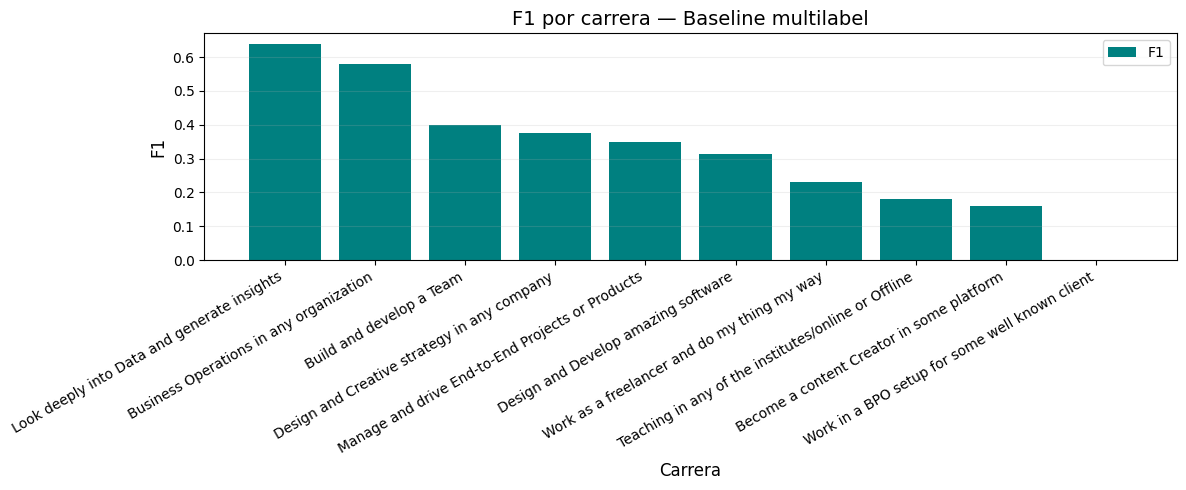

In [24]:
# F1 por label (interpretabilidad)
f1_per_label = f1_score(Y_test, Y_pred, average=None, zero_division=0)
order = np.argsort(f1_per_label)[::-1]

plt.figure(figsize=(12,5))
bars = plt.bar([mlb.classes_[i] for i in order],
               [f1_per_label[i] for i in order],
               color="teal")
plt.title("F1 por carrera — Baseline multilabel", fontsize=14)
plt.xlabel("Carrera", fontsize=12)
plt.ylabel("F1", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend([bars[0]], ["F1"], loc="upper right")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


##Análisis de resultados (multilabel)

En este problema, cada persona elige **3 carreras** dentro de **10**, por lo tanto evaluamos el modelo como **multilabel** (no multiclase).

**Métricas clave:**
- **Subset accuracy (exact match):** porcentaje de casos donde el modelo acierta **las 3 carreras exactas**. Es una métrica exigente; suele ser baja incluso con modelos razonables.
Un 0.0 significa que el modelo en ninguna ocasión predijo las tres carreras aspiracionales exactamente como estaban en los datos de prueba.
- **F1 micro:** prioriza el rendimiento global agregando todas las decisiones 0/1. Es la métrica más estable cuando hay etiquetas con distinta frecuencia.
36,70%, sugiere que el modelo tiene un rendimiento modesto en la identificación general de las etiquetas correctas. Es la métrica más estable cuando hay desbalance de clases.
- **F1 macro:** promedia el F1 por carrera; penaliza si el modelo ignora carreras raras.
32,27%, ligeramente inferior al F1 micro, podría indicar que el modelo tiene dificultades con algunas de las etiquetas menos frecuentes, ya que el F1 macro le da el mismo peso a todas las clases.
- **Jaccard micro:** mide similitud entre conjuntos predicho vs real.
22,47% es consistente con los F1-scores y refuerza la idea de un rendimiento modesto. Cuanto más cerca de 1, mejor es la similitud.
- **Precision@3 / Recall@3:** alineadas al enunciado (predecir 3).  
  - Precision@3: de las 3 que predice, cuántas son correctas en promedio.
  32.62% de esas predicciones son correctas. Esto es crucial, ya que el problema busca el Top-3.  
  - Recall@3: de las 3 verdaderas, cuántas recupera.
  De las 3 carreras que una persona realmente aspira, el modelo logra identificar aproximadamente el 32.62% de ellas dentro de sus 3 predicciones principales. Un recall bajo aquí significa que el modelo está 'perdiéndose' muchas de las verdaderas aspiraciones.

**Conclusión del Baseline**
El modelo baseline establece un punto de partida. Sus resultados muestran que es capaz de aprender algunas relaciones, pero hay un margen considerable para mejorar, especialmente en la precisión y recall para las predicciones del Top-3 y en el rendimiento de las clases menos frecuentes. Las métricas específicas por etiqueta (F1 por label) sugieren que el modelo se desempeña mejor en las aspiraciones más comunes y peor en las menos comunes o más difíciles de diferenciar.

Los próximos pasos se centraran en técnicas más avanzadas, como el ajuste de hiperparámetros para el modelo actual de Regresión Logística o la exploración de modelos más complejos

## 5) Tuning:
### 5.1 RandomizedSearchCV sobre el Pipeline (multilabel)

Ajustamos hiperparámetros del estimador base (LogisticRegression en OneVsRest) para maximizar **F1 micro**.


In [25]:
def topk_pred(proba, k=3):
    idx = np.argsort(proba, axis=1)[:, ::-1][:, :k]
    Yk = np.zeros_like(proba, dtype=int)
    for i in range(proba.shape[0]):
        Yk[i, idx[i]] = 1
    return Yk

tune_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", OneVsRestClassifier(
        LogisticRegression(max_iter=5000, class_weight="balanced", solver="lbfgs", random_state=RANDOM_STATE)
    ))
])

param_dist = {
    "model__estimator__C": [0.03, 0.05, 0.1, 0.3, 1, 3, 10, 30],
    "model__estimator__class_weight": [None, "balanced"],
}

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scorer = make_scorer(f1_score, average="micro", zero_division=0)

search = RandomizedSearchCV(
    estimator=tune_pipe,
    param_distributions=param_dist,
    n_iter=12,
    scoring=scorer,
    cv=cv,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, Y_train)

print("Mejores hiperparámetros:", search.best_params_)
best_tuned = search.best_estimator_

# Evaluación en test
Y_pred_tuned = best_tuned.predict(X_test)
Y_proba_tuned = best_tuned.predict_proba(X_test)

subset_acc_t = accuracy_score(Y_test, Y_pred_tuned)
f1_micro_t = f1_score(Y_test, Y_pred_tuned, average="micro", zero_division=0)
f1_macro_t = f1_score(Y_test, Y_pred_tuned, average="macro", zero_division=0)
jacc_t = jaccard_score(Y_test, Y_pred_tuned, average="micro", zero_division=0)

Y_top3_t = topk_pred(Y_proba_tuned, k=3)
prec_at3_t = precision_score(Y_test, Y_top3_t, average="micro", zero_division=0)
rec_at3_t  = recall_score(Y_test, Y_top3_t, average="micro", zero_division=0)

print("\n=== TUNED (MULTILABEL) ===")
print("Subset accuracy:", round(subset_acc_t, 4))
print("F1 micro:", round(f1_micro_t, 4))
print("F1 macro:", round(f1_macro_t, 4))
print("Jaccard micro:", round(jacc_t, 4))
print("Precision@3:", round(prec_at3_t, 4))
print("Recall@3:   ", round(rec_at3_t, 4))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'model__estimator__class_weight': 'balanced', 'model__estimator__C': 0.1}

=== TUNED (MULTILABEL) ===
Subset accuracy: 0.0213
F1 micro: 0.4073
F1 macro: 0.3555
Jaccard micro: 0.2557
Precision@3: 0.3688
Recall@3:    0.3688


### Gráfico — Rendimiento por carrera (F1 por label) del modelo tuneado


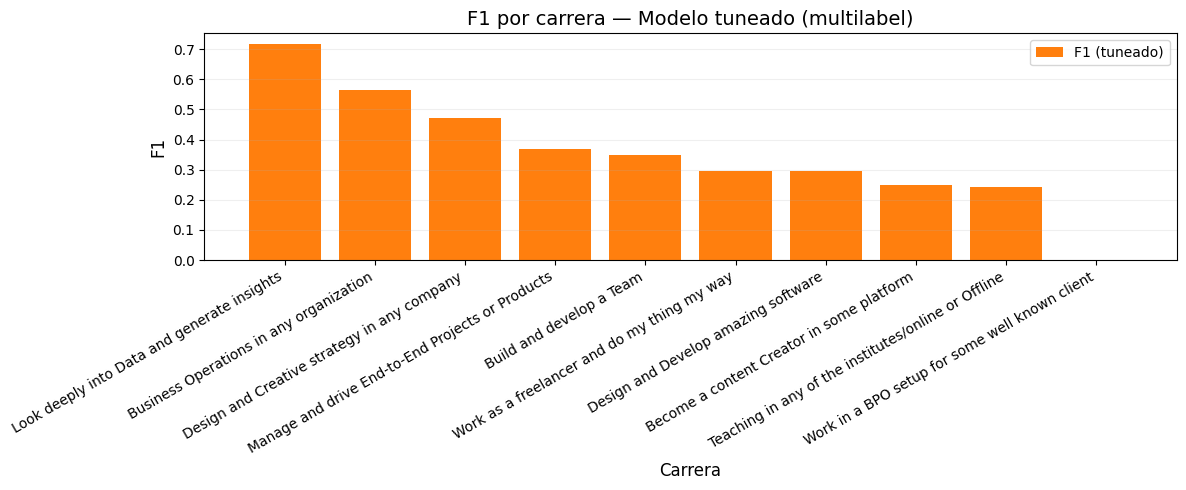

In [26]:
# F1 por label — modelo tuneado
f1_per_label_t = f1_score(Y_test, Y_pred_tuned, average=None, zero_division=0)
order_t = np.argsort(f1_per_label_t)[::-1]

plt.figure(figsize=(12,5))
bars = plt.bar([mlb.classes_[i] for i in order_t],
               [f1_per_label_t[i] for i in order_t],
               color="#ff7f0e")
plt.title("F1 por carrera — Modelo tuneado (multilabel)", fontsize=14)
plt.xlabel("Carrera", fontsize=12)
plt.ylabel("F1", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.legend([bars[0]], ["F1 (tuneado)"], loc="upper right")
plt.grid(axis="y", alpha=0.2)
plt.tight_layout()
plt.show()


##Análisis (tuning)

El tuning busca mejorar el rendimiento respecto al baseline. Para decidir si el tuning fue efectivo, compara:
- **Subset accuracy** (exact match): 0.0213
 A diferencia del baseline (0.0), el modelo tuneado logra predecir exactamente las tres carreras aspiracionales correctas en un 2.13% de los casos de prueba. Aunque sigue siendo un valor bajo, es una mejora significativa e indica que el modelo ahora es capaz de hacer algunas predicciones perfectas, lo cual es muy difícil en problemas multilabel.
- **F1 micro**: Esta es una de las métricas más importantes. El F1 micro ha mejorado de 36,70% (baseline) a 40,73%. Esta mejora del 4% indica una mejor capacidad general del modelo para identificar correctamente las etiquetas a través de todas las predicciones. Es un buen indicador de que el tuning ha sido efectivo.
- **F1 macro**: El F1 macro también muestra una mejora de 32,27% (baseline) a 35,55%. Esto es especialmente relevante porque el F1 macro le da el mismo peso a todas las etiquetas, sin importar su frecuencia. La mejora sugiere que el modelo tuneado no solo rinde mejor en las etiquetas comunes, sino que también ha mejorado su capacidad para predecir correctamente las carreras menos frecuentes.
- **Jaccard micro**: El coeficiente Jaccard, que mide la similitud entre el conjunto de etiquetas predichas y reales, también aumentó de 0.2247 a 0.2557. Esto confirma la mejora general en la calidad de las predicciones del modelo.

- **Precision@3 / Recall@3**: son las métricas más alineadas a “predecir 3 carreras”.

  - Precision@3 (micro): ha mejorado de 0.3262 a 0.3688. Esto significa que, de las tres carreras que el modelo tuneado predice para un individuo, una proporción mayor (casi 37%) es correcta.
  - Recall@3 (micro): similarmente, el Recall@3 ha subido de 0.3262 a 0.3688. Esto indica que el modelo tuneado es mejor para identificar las verdaderas aspiraciones de una persona dentro de sus tres predicciones principales, recuperando una mayor cantidad de las etiquetas correctas.

**Conclusión sobre el Modelo Tuneado**
El proceso de ajuste de hiperparámetros ha sido claramente exitoso. El modelo tuneado supera consistentemente al modelo baseline en todas las métricas evaluadas, especialmente en las más relevantes para el problema (F1 micro, F1 macro, Precision@3 y Recall@3). Esto indica que la optimización de los parámetros del modelo, particularmente el término de regularización (C) y el balanceo de clases (class_weight), ha permitido al LogisticRegression aprender patrones más robustos y generalizables de los datos. El modelo tuneado representa una mejora significativa.



## 6) Ensamble: Promedio de probabilidades (Top-3)

VotingClassifier no soporta multilabel de forma directa en este escenario. En su lugar, se construyó un ensamble simple y robusto promediando **probabilidades por label**.


In [27]:
# Modelo para ensamble: SGDClassifier (log_loss) + OneVsRest
sgd_model = OneVsRestClassifier(
    SGDClassifier(loss="log_loss", alpha=1e-4, max_iter=3000, random_state=RANDOM_STATE)
)

sgd_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", sgd_model)
])

sgd_pipe.fit(X_train, Y_train)

# Probabilidades de ambos modelos
proba_tuned = Y_proba_tuned
proba_sgd = sgd_pipe.predict_proba(X_test)

proba_ens = (proba_tuned + proba_sgd) / 2.0


In [28]:
# Evaluación del ensamble
# Predicción binaria por umbral (0.5) + evaluación Top-3
Y_pred_ens = (proba_ens >= 0.5).astype(int)
subset_acc_e = accuracy_score(Y_test, Y_pred_ens)
f1_micro_e = f1_score(Y_test, Y_pred_ens, average="micro", zero_division=0)
f1_macro_e = f1_score(Y_test, Y_pred_ens, average="macro", zero_division=0)
jacc_e = jaccard_score(Y_test, Y_pred_ens, average="micro", zero_division=0)

Y_top3_e = topk_pred(proba_ens, k=3)
prec_at3_e = precision_score(Y_test, Y_top3_e, average="micro", zero_division=0)
rec_at3_e  = recall_score(Y_test, Y_top3_e, average="micro", zero_division=0)

print("=== ENSAMBLE (MULTILABEL) ===")
print("Subset accuracy:", round(subset_acc_e, 4))
print("F1 micro:", round(f1_micro_e, 4))
print("F1 macro:", round(f1_macro_e, 4))
print("Jaccard micro:", round(jacc_e, 4))
print("Precision@3:", round(prec_at3_e, 4))
print("Recall@3:   ", round(rec_at3_e, 4))


=== ENSAMBLE (MULTILABEL) ===
Subset accuracy: 0.0
F1 micro: 0.33
F1 macro: 0.2563
Jaccard micro: 0.1976
Precision@3: 0.3191
Recall@3:    0.3191


##Análisis modelo de ensamble

- **Subset Accuracy (Exact Match)**:

0% Esto significa que el modelo de ensamble no logró predecir con exactitud las tres carreras aspiracionales correctas en ningún caso del conjunto de prueba. Es una métrica muy estricta, pero un 0.0 sugiere que el ensamble no está capturando la combinación perfecta de etiquetas.

- **F1 Micro**:

El F1 micro es una métrica global que considera la capacidad general del modelo para identificar etiquetas. Un valor de 33% indica un rendimiento modesto en la identificación de etiquetas correctas en general.

- **F1 Macro**:

El F1 macro promedia el F1-score por cada clase, dando el mismo peso a todas. Un valor de 25,63%, más bajo que el F1 micro, podría sugerir que el ensamble tiene dificultades con algunas de las clases menos frecuentes, ya que estas están penalizando el promedio.

Jaccard Micro: 0.1976

El coeficiente de Jaccard mide la similitud entre el conjunto de etiquetas predichas y el conjunto de etiquetas reales. Un valor de casi 0.20 refuerza la idea de un rendimiento modesto, indicando que hay una superposición limitada entre lo que el modelo predice y lo que es realmente correcto.
Precision@3: 0.3191

Esta métrica es crucial para el problema, ya que se busca un Top-3. Significa que, de las 3 carreras que el modelo de ensamble predice, aproximadamente el 31.91% son correctas.
Recall@3: 0.3191

También es muy importante para el problema. Indica que de las 3 carreras a las que una persona realmente aspira, el ensamble logra identificar aproximadamente el 31.91% de ellas dentro de sus 3 predicciones principales.
Resumen del ensamble:

El modelo de ensamble, en su configuración actual, muestra un rendimiento modesto. Aunque logra algunas predicciones correctas, sus métricas son relativamente bajas, especialmente en la precisión y recall de las 3 principales predicciones, que es el foco del problema. Parece que la estrategia de ensamble utilizada (promedio de probabilidades) no ha logrado mejorar significativamente la capacidad predictiva en este caso, o incluso la ha reducido en comparación con el modelo tuneado individual.

#Analizando los resultados, el modelo que presentó mejores resultados fue el Tuning donde se ajustaron los hiperparámetros del estimador base (LogisticRegression en OneVsRest) para maximizar F1 micro.

## 7) Guardado del mejor modelo (para producción/API)

Guardamos un **bundle** con:
- modelo final (tuned o ensamble)
- `MultiLabelBinarizer` (mapeo de índices a labels)
- lista de `FEATURE_COLS`


In [38]:
import joblib, os

os.makedirs("models", exist_ok=True)

bundle = {
    "mode": "tuned",
    "model": best_tuned,
    "mlb": mlb,
    "features": FEATURE_COLS,
    "target": TARGET,
    "sep": SEP,

    "metrics_eval": {
        "tuned": {"f1_micro": float(f1_micro_t), "prec_at3": float(prec_at3_t)},
        "ensemble": {"f1_micro": float(f1_micro_e), "prec_at3": float(prec_at3_e)}
    },
    "production_note": "API sirve modelo tuned fijo por estabilidad; ensamble se reporta solo como evaluación."
}

BUNDLE_PATH = "models/genz_bundle.pkl"
joblib.dump(bundle, BUNDLE_PATH)

print("Guardado:", BUNDLE_PATH)
print("Modo producción:", bundle["mode"])

Guardado: models/genz_bundle.pkl
Modo producción: tuned


In [30]:
print('Variables (features) esperadas por el modelo:')
for col in FEATURE_COLS:
    print(f'- {col}')


Variables (features) esperadas por el modelo:
- Your Current Country.
- Your Gender
- Which of the below factors influence the most about your career aspirations ?
- Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.
- How likely is that you will work for one employer for 3 years or more ?
- Would you work for a company whose mission is not clearly defined and publicly posted.
- How likely would you work for a company whose mission is misaligned with their public actions or even their product ?
- How likely would you work for a company whose mission is not bringing social impact ?
- What is the most preferred working environment for you.
- Which of the below Employers would you work with.
- Which type of learning environment that you are most likely to work in ?
- What type of Manager would you work without looking into your watch ?
- Which of the following setup you would like to work ?


In [31]:
!pip -q install pandas numpy matplotlib scikit-learn fastapi uvicorn pyngrok joblib requests

In [ ]:
from google.colab import files

files.download("GenZ_Entrega_UDD.zip")
files.download("README.md")
files.download("requirements.txt")
files.download("api/app.py")
files.download("models/genz_multilabel_model.joblib")
files.download("models/genz_mlb.joblib")

Para enviar datos a la API, el cuerpo de tu solicitud JSON debería tener esta estructura, usando las variables listadas como claves. Asegúrate de reemplazar los valores con los datos reales de la persona para la que quieres una predicción:

```json
{
  "data": {
    "Your Current Country.": "India",
    "Your Gender": "Male",
    "Which of the below factors influence the most about your career aspirations ?": "People who have changed the world for better",
    "Would you definitely pursue a Higher Education / Post Graduation outside of India ? If only you have to self sponsor it.": "Yes, I will earn and do that",
    "How likely is that you will work for one employer for 3 years or more ?": "This will be hard to do, but if it is the right company I will",
    "Would you work for a company whose mission is not clearly clearly defined and publicly posted.": "No",
    "How likely would you work for a company whose mission is misaligned with their public actions or even their product ?": "Will NOT work for them",
    "How likely would you work for a company whose mission is not bringing social impact ?": 4,
    "What is the most preferred working environment for you.": "Hybrid",
    "Which of the below Employers would you work with.": "Google",
    "Which type of learning environment that you are most likely to work in ?": "Practical training with real world projects and case studies",
    "What type of Manager would you work without looking into your watch ?": "A manager who empowers you and enables you to take educated risks",
    "Which of the following setup you would like to work ?": "Small Team working on a module"
  }
}
```

**Recuerda**: Los valores deben ser del tipo de dato adecuado (por ejemplo, `int` para la pregunta numérica y `str` para las respuestas de texto). El *pipeline* de preprocesamiento de tu API se encargará de transformarlos internamente para el modelo.